# Part 1. Hypothesis Testing

## Libraries

For today's demo, we'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes**, since it has some nice characteristics for linear modeling. 

We will be demostrating *hypothesis testing* as it relates to linear modeling. We'll dive into how to do linear regression models in later classes. 

In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Student Question- What are the **features**?

In [5]:
"TV, Radio, Newspaper"


'TV, Radio, Newspaper'

### Student Question- What is the **outcome**?

Answer:

In [6]:
# print the shape of the DataFrame
np.shape(data)

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

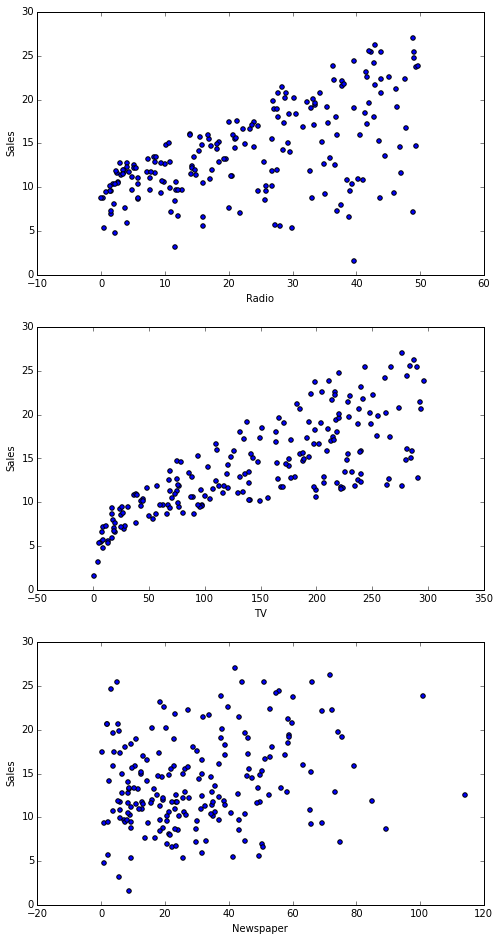

In [49]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 1, sharey=True)
n= 0
for x in ["Radio", "TV", "Newspaper"]:
    data.plot(kind='scatter', x=x, y='Sales', ax=axs[n], figsize=(8, 16))
    n+=1
#     data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
#     data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
1. Is there a relationship between ads and sales?

### Student Question- Is this a causal relationship? 

Answer: Correlation 

### Student Question: What other questions might we want to know about this data?

Answer:


Let's use **Statsmodels** to estimate the association between advertising efforts and sales. 

In [51]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='Sales ~ TV+Radio', data=data).fit()

#print the full summary
lm.summary()


PatsyError: expected a noun, but instead the expression ended
    Sales ~
          ^

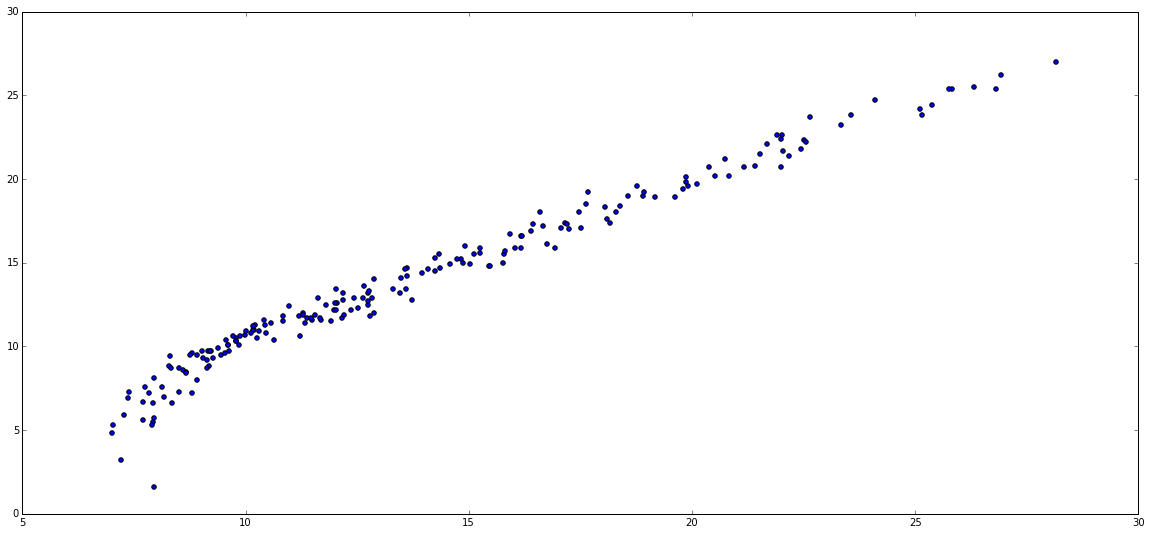

In [46]:
plt.figure(figsize = (20,9))
plt.scatter(x = lm.predict(data[["TV","Radio"]]), y = data["Sales"])

In [12]:
# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [ ]:
lm.predict()

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50000$$

In [13]:
# manually calculate the prediction
7.032594 + 0.047537*50000

2383.882594

Thus, we would predict Sales of **2,383 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [16]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50000], "Radio": [0], "Newspaper": [0]})
X_new.head()

,Newspaper,Radio,TV
0,0,0,50000


In [18]:
def regress(tv, radio, newspaper):
    y = lm.params[0] + (lm.params[1] * tv) + (lm.params[2] * radio) + (lm.params[1] * newspaper)
    print y

In [19]:
regress(50000, 0, 0)

2291.17116214


In [17]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 2291.17116214])

In [ ]:
for tv, radio, news

# Part 2. Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias low variance

---

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [24]:
# print the confidence intervals for the model coefficients
#alpha will change your confidence interval (.01 will give you a 99% confidence interval)
lm.conf_int(alpha = .01)

,0,1
Intercept,2.127571,3.750208
TV,0.042136,0.049393
Radio,0.166131,0.210929
Newspaper,-0.016309,0.014234


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

Note that "failing to reject" the null is ***not*** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet. 

As it relates to model coefficients, here is the conventional hypothesis test:

- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? We reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. 

Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [21]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. 

If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. Using 0.05 as the cutoff is a standard convention.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

#### We'll come back to this later